In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


## Load Tasks

In [0]:
import pandas as pd
task1 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/07 Data Science Workshop/MachineEvent/task_events/part-00000-of-00500.csv'
                      ,header=None)
task2 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/07 Data Science Workshop/MachineEvent/task_events/part-00001-of-00500.csv'
                      ,header=None)
task3 = pd.read_csv('/gdrive/My Drive/Colab Notebooks/07 Data Science Workshop/MachineEvent/task_events/part-00002-of-00500.csv'
                      ,header=None)

task = pd.concat([task1, task2, task3])
task.columns = ['timestamp','missingInfo1','jobID','taskIndex','machineID','eventType','userName','schedulingClass','priority','CPUCore','RAM','Disk','Constraint']

task.shape

(688564, 13)

In [0]:
task.describe().toPandas()

,summary,timestamp,missingInfo,jobID,taskIndex,machineID,eventType,userName,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
0,count,688564,291,688564,688564,478080,688564,688564,688564,688564,688273,688273,688273,688273
1,mean,4.741422700288498E9,2.0,5.61887839161121E9,1429.0463355621264,1.27341816670675E9,1.1666047019594403,None,0.8039397935413412,2.601460430693443,0.03884034383231887,0.031075616951428263,2.805061463372262E-4,0.31396553402501626
2,stddev,5.43897451665724E9,0.0,1.5177704835123165E9,3322.689172042024,1.740422426362313E9,1.4951495564505684,None,1.0485087184806208,3.2407901122903358,0.04305137202379286,0.032846761644067794,3.5078801316292517E-4,0.4641028877460829
3,min,0,2,1005190908,0,10,0,+1FmidGvPEtSIUb/sNfYW604cEUUmyhWukDdV7QXpUI=,0,0,0,0,0,0
4,max,9999217125,2,986962601,9999,998338022,5,zw1n/yVS+nVzkMJvYOR68YEiqR0e1O3TVLh6u84gaQE=,3,9,0.5,6.199e-05,9.918e-05,1


In [0]:
task.eventType.value_counts()

0    282755
1    271074
4     79778
5     32186
2     16147
3      6624
Name: eventType, dtype: int64

## Data Cleasing  
After joinning Machine with Task & Job The event status = 3 is gone 
then we will focus at Tasks only  

In [0]:
task.describe()

,timestamp,missingInfo1,jobID,taskIndex,machineID,eventType,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
count,6.885640e+05,291.0,6.885640e+05,688564.000000,4.780800e+05,688564.000000,688564.000000,688564.00000,688273.000000,688273.000000,688273.000000,688273.000000
mean,4.741423e+09,2.0,5.618878e+09,1429.046336,1.273418e+09,1.166605,0.803940,2.60146,0.038840,0.031076,0.000281,0.313966
std,5.438975e+09,0.0,1.517770e+09,3322.689172,1.740422e+09,1.495150,1.048509,3.24079,0.043051,0.032847,0.000351,0.464103
min,0.000000e+00,2.0,3.418309e+06,0.000000,5.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,2.0,6.146435e+09,55.000000,6.641557e+06,0.000000,0.000000,0.00000,0.012500,0.013170,0.000038,0.000000
50%,2.199344e+09,2.0,6.250258e+09,326.000000,3.183599e+08,1.000000,0.000000,2.00000,0.024990,0.024570,0.000215,0.000000
75%,9.868463e+09,2.0,6.251982e+09,983.000000,2.191052e+09,1.000000,2.000000,2.00000,0.062500,0.033390,0.000386,1.000000
max,1.563175e+10,2.0,6.252618e+09,20009.000000,6.248207e+09,5.000000,3.000000,11.00000,0.500000,0.955100,0.009720,1.000000


In [0]:
task.eventType.value_counts()

0    282755
1    271074
4     79778
5     32186
2     16147
3      6624
Name: eventType, dtype: int64

In [0]:
data = task[['eventType','schedulingClass','priority','CPUCore','RAM','Disk','Constraint']]

In [0]:
data.describe()

,eventType,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
count,688564.000000,688564.000000,688564.00000,688273.000000,688273.000000,688273.000000,688273.000000
mean,1.166605,0.803940,2.60146,0.038840,0.031076,0.000281,0.313966
std,1.495150,1.048509,3.24079,0.043051,0.032847,0.000351,0.464103
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.012500,0.013170,0.000038,0.000000
50%,1.000000,0.000000,2.00000,0.024990,0.024570,0.000215,0.000000
75%,1.000000,2.000000,2.00000,0.062500,0.033390,0.000386,1.000000
max,5.000000,3.000000,11.00000,0.500000,0.955100,0.009720,1.000000


In [0]:
df = data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688564 entries, 0 to 160641
Data columns (total 7 columns):
eventType          688564 non-null int64
schedulingClass    688564 non-null int64
priority           688564 non-null int64
CPUCore            688273 non-null float64
RAM                688273 non-null float64
Disk               688273 non-null float64
Constraint         688273 non-null float64
dtypes: float64(4), int64(3)
memory usage: 42.0 MB


In [0]:
## Check Null
df.isnull().values.any()

True

In [0]:
df.describe(include='all')

,eventType,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
count,688564.000000,688564.000000,688564.00000,688273.000000,688273.000000,688273.000000,688273.000000
mean,1.166605,0.803940,2.60146,0.038840,0.031076,0.000281,0.313966
std,1.495150,1.048509,3.24079,0.043051,0.032847,0.000351,0.464103
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.012500,0.013170,0.000038,0.000000
50%,1.000000,0.000000,2.00000,0.024990,0.024570,0.000215,0.000000
75%,1.000000,2.000000,2.00000,0.062500,0.033390,0.000386,1.000000
max,5.000000,3.000000,11.00000,0.500000,0.955100,0.009720,1.000000


## Check Null on each column && DROP THEM

In [0]:
print("eventType : Null is ",df.eventType.isna().value_counts())
print("\nschedulingClass : Null is ",df.schedulingClass.isna().value_counts())
print("\npriority : Null is ",df.priority.isna().value_counts())
print("\nCPUCore : Null is ",df.CPUCore.isna().value_counts())
print("\nRAM : Null is ",df.RAM.isna().value_counts())
print("\nDisk : Null is ",df.Disk.isna().value_counts())
print("\nConstraint : Null is ",df.Constraint.isna().value_counts())

eventType : Null is  False    688564
Name: eventType, dtype: int64

schedulingClass : Null is  False    688564
Name: schedulingClass, dtype: int64

priority : Null is  False    688564
Name: priority, dtype: int64

CPUCore : Null is  False    688273
True        291
Name: CPUCore, dtype: int64

RAM : Null is  False    688273
True        291
Name: RAM, dtype: int64

Disk : Null is  False    688273
True        291
Name: Disk, dtype: int64

Constraint : Null is  False    688273
True        291
Name: Constraint, dtype: int64


In [0]:
## Drop Null Data
df_ok = df.dropna(subset=['CPUCore','RAM','Disk','Constraint'])

In [0]:
df_ok.isnull().values.any()

False

In [0]:
print("eventType : Null is ",df_ok.eventType.isna().value_counts())
print("\nschedulingClass : Null is ",df_ok.schedulingClass.isna().value_counts())
print("\npriority : Null is ",df_ok.priority.isna().value_counts())
print("\nCPUCore : Null is ",df_ok.CPUCore.isna().value_counts())
print("\nRAM : Null is ",df_ok.RAM.isna().value_counts())
print("\nDisk : Null is ",df_ok.Disk.isna().value_counts())
print("\nConstraint : Null is ",df_ok.Constraint.isna().value_counts())

eventType : Null is  False    688273
Name: eventType, dtype: int64

schedulingClass : Null is  False    688273
Name: schedulingClass, dtype: int64

priority : Null is  False    688273
Name: priority, dtype: int64

CPUCore : Null is  False    688273
Name: CPUCore, dtype: int64

RAM : Null is  False    688273
Name: RAM, dtype: int64

Disk : Null is  False    688273
Name: Disk, dtype: int64

Constraint : Null is  False    688273
Name: Constraint, dtype: int64


In [0]:
df_ok.eventType.value_counts()

0    282464
1    271074
4     79778
5     32186
2     16147
3      6624
Name: eventType, dtype: int64

## Convert Event type to Binominal  -- 3 and others

In [0]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688273 entries, 2 to 160641
Data columns (total 7 columns):
eventType          688273 non-null int64
schedulingClass    688273 non-null int64
priority           688273 non-null int64
CPUCore            688273 non-null float64
RAM                688273 non-null float64
Disk               688273 non-null float64
Constraint         688273 non-null float64
dtypes: float64(4), int64(3)
memory usage: 42.0 MB


In [0]:
df_ok["eventType"] = pd.to_numeric(df_ok.eventType, errors='coerce')
df_ok["schedulingClass"] = df_ok.schedulingClass.astype(float)
df_ok["priority"] = df_ok.priority.astype(float)
df_ok["CPUCore"] = df_ok.CPUCore.astype(float)
df_ok["RAM"] = df_ok.RAM.astype(float)
df_ok["Disk"] = df_ok.Disk.astype(float)
df_ok["Constraint"] = df_ok.Constraint.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
df_ok.describe()

,eventType,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
count,688273.000000,688273.000000,688273.000000,688273.000000,688273.000000,688273.000000,688273.000000
mean,1.167098,0.803639,2.601106,0.038840,0.031076,0.000281,0.313966
std,1.495273,1.048376,3.240291,0.043051,0.032847,0.000351,0.464103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.012500,0.013170,0.000038,0.000000
50%,1.000000,0.000000,2.000000,0.024990,0.024570,0.000215,0.000000
75%,1.000000,2.000000,2.000000,0.062500,0.033390,0.000386,1.000000
max,5.000000,3.000000,11.000000,0.500000,0.955100,0.009720,1.000000


In [0]:
def failTranform(a):
  if(a==3):
    return 1;
  else:
    return 0;


df_ok['eventType'] = df_ok['eventType'].apply(failTranform)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df_ok.eventType.value_counts()

0    681649
1      6624
Name: eventType, dtype: int64

In [0]:
df.shape

(688564, 7)

In [0]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688273 entries, 2 to 160641
Data columns (total 7 columns):
eventType          688273 non-null int64
schedulingClass    688273 non-null float64
priority           688273 non-null float64
CPUCore            688273 non-null float64
RAM                688273 non-null float64
Disk               688273 non-null float64
Constraint         688273 non-null float64
dtypes: float64(6), int64(1)
memory usage: 42.0 MB


## Train & Test Sprit

In [0]:
from sklearn.model_selection import train_test_split
y = df_ok['eventType']
X = df_ok.drop(columns='eventType')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.head()

print("Train:",X_train.shape,",",y_train.shape)

print("Test:",X_test.shape)

Train: (550618, 6) , (550618,)
Test: (137655, 6)


In [0]:
y_test.head()

147714    0
391473    0
437614    0
122283    0
303379    0
Name: eventType, dtype: int64

## Model 

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(random_state=0)
clf_random = clf_random.fit(X_train, y_train)

print(clf_random)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [0]:
#Feature Importance

tree_feature = pd.DataFrame({'feature':X_train.columns,
                             'Score':clf_random.feature_importances_})

tree_feature.sort_values(by = 'Score', ascending=False)

,feature,Score
4,Disk,0.335801
3,RAM,0.235203
1,priority,0.194116
2,CPUCore,0.163152
0,schedulingClass,0.060059
5,Constraint,0.011670


## Evaluation

In [0]:
#confusion metrix
res = clf_random.predict(X_test)
pd.crosstab(y_test, res)

col_0,0
eventType,
0,136319
1,1336


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f"%accuracy_score(y_test, res))
print(classification_report(y_test, res))

Accuracy:	 0.990
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    136319
           1       0.00      0.00      0.00      1336

    accuracy                           0.99    137655
   macro avg       0.50      0.50      0.50    137655
weighted avg       0.98      0.99      0.99    137655



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Correlation

In [0]:
corrs = df_ok.corr()
corrs

,eventType,schedulingClass,priority,CPUCore,RAM,Disk,Constraint
eventType,1.000000,-0.058659,-0.032630,-0.033876,-0.003135,-0.056659,-0.053477
schedulingClass,-0.058659,1.000000,0.521971,0.336816,0.203673,-0.011974,-0.022165
priority,-0.032630,0.521971,1.000000,0.391239,0.310646,0.116261,0.232402
CPUCore,-0.033876,0.336816,0.391239,1.000000,0.471802,0.168441,0.105598
RAM,-0.003135,0.203673,0.310646,0.471802,1.000000,0.506760,0.201909
Disk,-0.056659,-0.011974,0.116261,0.168441,0.506760,1.000000,0.195243
Constraint,-0.053477,-0.022165,0.232402,0.105598,0.201909,0.195243,1.000000


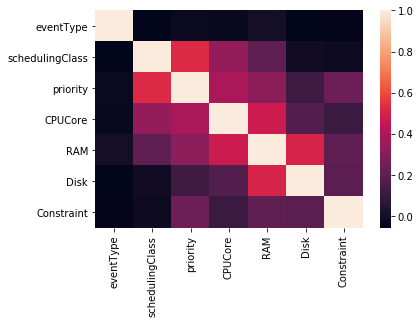

In [0]:
import seaborn as sns
sns.heatmap(corrs)

## Scaled Data & Train Data

In [0]:
from sklearn import preprocessing

# standard_scaler = preprocessing.StandardScaler()
# train_X_scaled_s = pd.DataFrame(standard_scaler.fit_transform(bankData_train_X), columns=bankData_train_X.columns)
# test_X_scaled_s = pd.DataFrame(standard_scaler.fit_transform(bankData_test_X), columns=bankData_train_X.columns)

min_max_scaler = preprocessing.MinMaxScaler()
X_Train_Scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns=X_train.columns)
X_Test_Scaled = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns=X_train.columns)

In [0]:
clf_random = RandomForestClassifier(random_state=0)
clf_random = clf_random.fit(X_Train_Scaled, y_train)

#confusion metrix
res = clf_random.predict(X_Test_Scaled)
pd.crosstab(y_test, res)
print("Accuracy:\t %.3f"%accuracy_score(y_test, res))
print(classification_report(y_test, res))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:	 0.990
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    136319
           1       0.00      0.00      0.00      1336

    accuracy                           0.99    137655
   macro avg       0.50      0.50      0.50    137655
weighted avg       0.98      0.99      0.99    137655



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## DownSizing  Training Data

In [0]:
df_ok[df_ok.eventType == 0].eventType.value_counts()

0    681649
Name: eventType, dtype: int64

In [0]:
df_ok[df_ok.eventType == 1].eventType.value_counts()

1    6624
Name: eventType, dtype: int64

In [0]:
df_success = df_ok[df_ok.eventType == 0]

df_success.shape
df_s_7000 = df_success.sample(n=7000)
#df_s_7000 = df_success.iloc[0:7000,]
df_s_7000.shape

(7000, 7)

In [0]:
df_downSmapling =  pd.concat([df_s_7000,df_ok[df_ok.eventType == 1]],ignore_index=True)


df_downSmapling.shape


(13624, 7)

In [0]:
from sklearn.model_selection import train_test_split
y = df_downSmapling['eventType']
X = df_downSmapling.drop(columns='eventType')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
X_train.head()

print("Train:",X_train.shape,",",y_train.shape)

print("Test:",X_test.shape)

Train: (8174, 6) , (8174,)
Test: (5450, 6)


## Train with Random Forest

In [0]:
clf_random = RandomForestClassifier(random_state=0)
clf_random = clf_random.fit(X_train, y_train)

#confusion metrix
res = clf_random.predict(X_test)
pd.crosstab(y_test, res)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


col_0,0,1
eventType,,
0,2516,286
1,95,2553


In [0]:
print("Accuracy:\t %.3f"%accuracy_score(y_test, res))
print(classification_report(y_test, res))

Accuracy:	 0.930
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2802
           1       0.90      0.96      0.93      2648

    accuracy                           0.93      5450
   macro avg       0.93      0.93      0.93      5450
weighted avg       0.93      0.93      0.93      5450



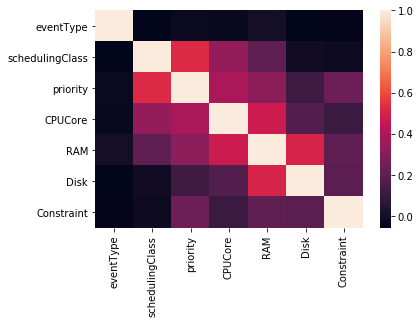

In [0]:
corrs = df_ok.corr()
sns.heatmap(corrs)